<a href="https://colab.research.google.com/github/SarmSKunatham/Oil_Palm_Leaves_Classification/blob/main/Oil_Palm_Leaves_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip file
!unzip /content/drive/MyDrive/Oil-palm-leaves.zip -d /content/drive/MyDrive/OilPalmLeavesDataset

In [2]:
# Dataset path
dataset = "/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2"

# Import

In [75]:
# Import goes here
import os
import glob
import numpy as np
import tensorflow as tf
import cv2
import pandas
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose, SeparableConv2D
from keras.models import Sequential
from keras.layers import BatchNormalization

# Creat a Dataset

In [77]:
# Adjustable parameter
BATCH_SIZE = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [78]:
# Train datagenerator / augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Test datagenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# For Boron (B)

In [79]:
# Train set
training_set_B = train_datagen.flow_from_directory('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/B/train',
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
# Test set
testing_set_B = test_datagen.flow_from_directory('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/B/test',
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

Found 614 images belonging to 3 classes.
Found 68 images belonging to 3 classes.


Boron has 3 classes : Deficiency, Excess ,and Normal

In [80]:
# Labels for B classes
labels = {0: 'deficiency',
          1: 'excess',
          2: 'normal'
          }

(50, 224, 224, 3)


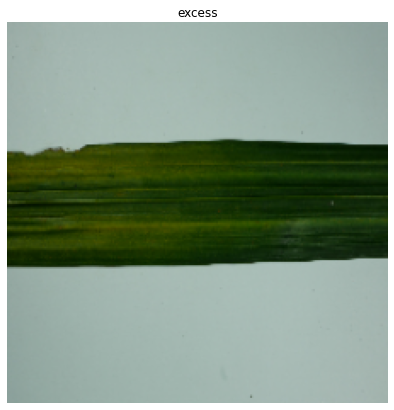

(50, 224, 224, 3)


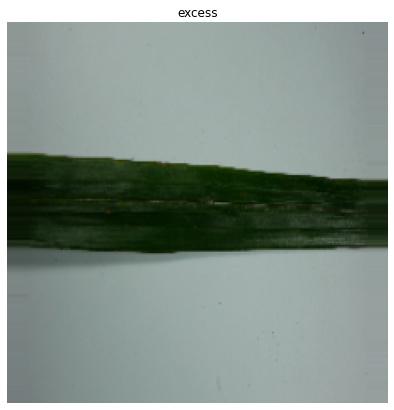

(50, 224, 224, 3)


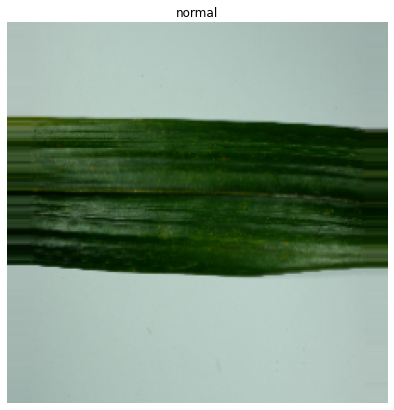

(50, 224, 224, 3)


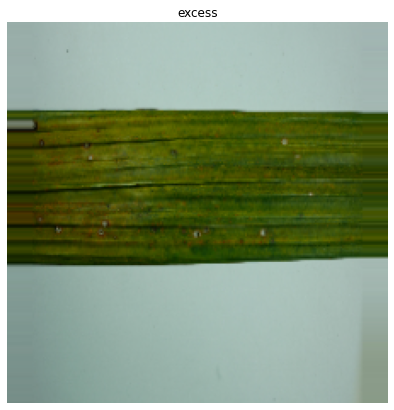

(50, 224, 224, 3)


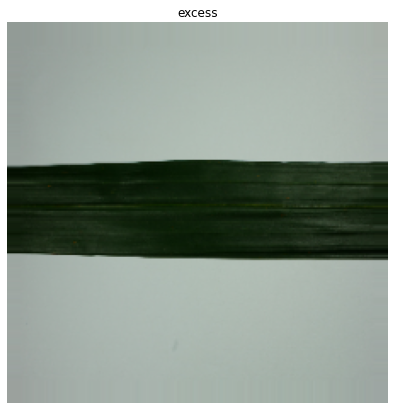

(50, 224, 224, 3)


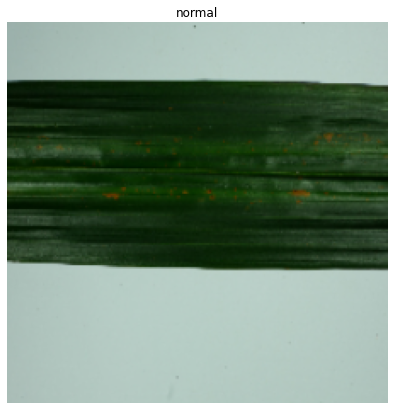

(50, 224, 224, 3)


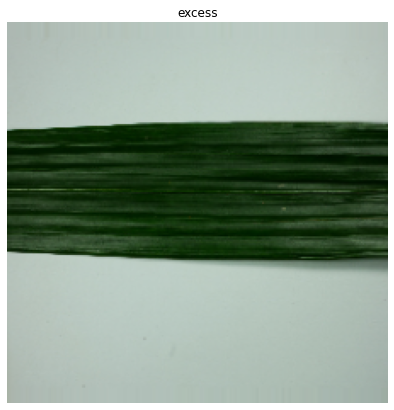

(50, 224, 224, 3)


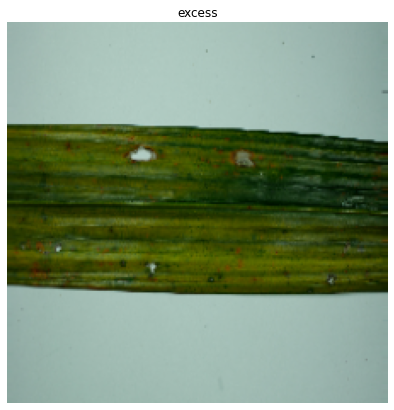

(50, 224, 224, 3)


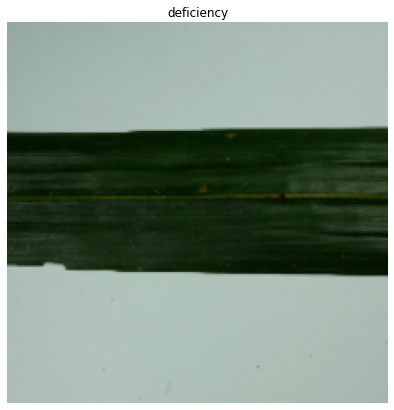

(50, 224, 224, 3)


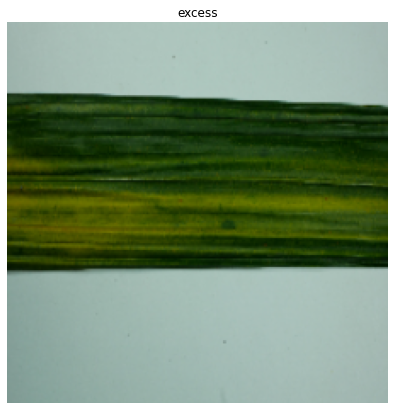

(50, 224, 224, 3)


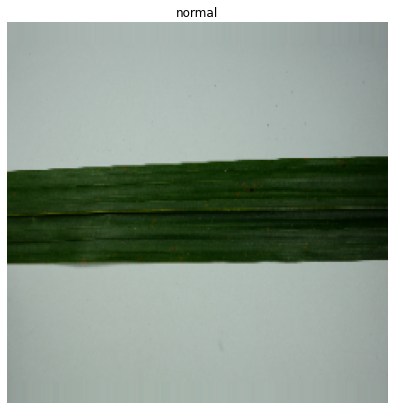

(50, 224, 224, 3)


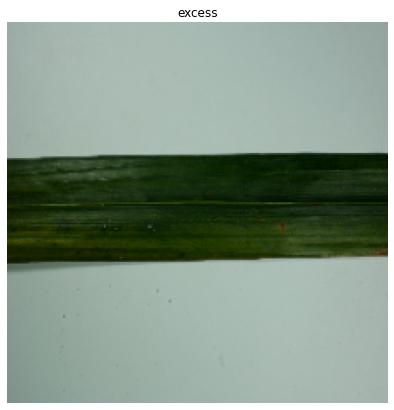

In [62]:
# Visualize example of images
for _ in range(12):
    plt.figure(figsize = (7, 7))
    img, label = training_set_B.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(labels[np.argmax(label[0])])
    plt.axis("off")
    plt.show()

# Create Model (Resnet 50)

In [101]:
# Create model
def create_model(trainable = False):
  model=Sequential()
  model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(105,105,3)))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.layers[0].trainable = trainable # cuztomizable layer

  return model

In [102]:
# model setup
model = create_model(True)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 256)               524544    
                                                                 
 dense_22 (Dense)            (None, 3)                 771       
                                                                 
Total params: 24,121,219
Trainable params: 24,064,003
Non-trainable params: 57,216
_____________________________________

In [104]:
# Callbacks
early_stopping= EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=15, verbose=0, mode='auto')

# filepath="/content/Drive/MyDrive/SouthernPalm/B-Freeze"

# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping]

In [105]:
# Start training
import time
start_time = time.time()
history = model.fit(training_set_B,
          validation_data = testing_set_B,
          epochs=200,
          verbose=1,
          shuffle=True,
          callbacks=callbacks_list)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
13/13 [==============================] - 17s 778ms/step - loss: 1.7021 - accuracy: 0.5033 - val_loss: 11.2660 - val_accuracy: 0.6176
Epoch 2/200
13/13 [==============================] - 9s 660ms/step - loss: 0.8124 - accuracy: 0.6336 - val_loss: 590.6990 - val_accuracy: 0.6176
Epoch 3/200
13/13 [==============================] - 9s 719ms/step - loss: 0.8175 - accuracy: 0.6873 - val_loss: 6588.4126 - val_accuracy: 0.6176
Epoch 4/200
13/13 [==============================] - 9s 660ms/step - loss: 0.7025 - accuracy: 0.7085 - val_loss: 1260.6826 - val_accuracy: 0.6176
Epoch 5/200
13/13 [==============================] - 9s 695ms/step - loss: 0.9146 - accuracy: 0.6743 - val_loss: 471343.3125 - val_accuracy: 0.2794
Epoch 6/200
13/13 [==============================] - 9s 660ms/step - loss: 0.7627 - accuracy: 0.7020 - val_loss: 114350.9141 - val_accuracy: 0.2794
Epoch 7/200
13/13 [==============================] - 9s 652ms/step - loss: 0.7710 - accuracy: 0.7117 - val_loss: 160197.67

# Create model CNN layer

In [109]:
# CNN layers model
def create_CNN_model():
  model = Sequential()
  # - Convolution
  model.add(SeparableConv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

  # - Pooling
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Adding a second convolutional layer
  model.add(SeparableConv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(SeparableConv2D(96, (3, 3), activation = 'relu'))

  # - Flattening
  model.add(Flatten())

  #- Full connection
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 3, activation = 'softmax'))

  return model

In [96]:
# build a model
CNN_model = create_CNN_model()
# Compiling the CNN
CNN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [97]:
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_12 (Separa  (None, 222, 222, 32)     155       
 bleConv2D)                                                      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 separable_conv2d_13 (Separa  (None, 109, 109, 64)     2400      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 separable_conv2d_14 (Separa  (None, 52, 52, 96)      

In [98]:
# Callbacks
early_stopping= EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=0, mode='auto')

# filepath="/content/Drive/MyDrive/SouthernPalm/B-Freeze"

# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping]

In [99]:
# Start training
import time
start_time = time.time()
history = CNN_model.fit(training_set_B,
          validation_data = testing_set_B,
          epochs=200,
          shuffle=True,
          callbacks = callbacks_list)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
13/13 [==============================] - 10s 675ms/step - loss: 0.9408 - accuracy: 0.6189 - val_loss: 0.9396 - val_accuracy: 0.6176
Epoch 2/200
13/13 [==============================] - 9s 652ms/step - loss: 0.9296 - accuracy: 0.6189 - val_loss: 0.9422 - val_accuracy: 0.6176
Epoch 3/200
13/13 [==============================] - 9s 645ms/step - loss: 0.8957 - accuracy: 0.6189 - val_loss: 0.8798 - val_accuracy: 0.6176
Epoch 4/200
13/13 [==============================] - 9s 648ms/step - loss: 0.8831 - accuracy: 0.6189 - val_loss: 0.8838 - val_accuracy: 0.6176
Epoch 5/200
13/13 [==============================] - 9s 655ms/step - loss: 0.8848 - accuracy: 0.6189 - val_loss: 0.8650 - val_accuracy: 0.6176
Epoch 6/200
13/13 [==============================] - 9s 654ms/step - loss: 0.8812 - accuracy: 0.6189 - val_loss: 0.8665 - val_accuracy: 0.6176
Epoch 7/200
13/13 [==============================] - 9s 651ms/step - loss: 0.8700 - accuracy: 0.6189 - val_loss: 0.8714 - val_accuracy: 0.617

In [100]:
# Save model
filepath="/content/Drive/MyDrive/SouthernPalm"
CNN_model.save(os.path.join(filepath, 'B-CNN'))

INFO:tensorflow:Assets written to: /content/Drive/MyDrive/SouthernPalm/B-CNN/assets


In [107]:
res = CNN_model.evaluate(testing_set_B)

2/2 [==============================] - 0s 60ms/step - loss: 0.8461 - accuracy: 0.6324


In [108]:
print(f'Training accuracy: {res[0]}')
print(f'Validation accuracy: {res[1]}')

Training accuracy: 0.8460546731948853
Validation accuracy: 0.6323529481887817
